In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [209]:
# from pandas_gbq import read_gbq
# merged_data = read_gbq(f"""


# SELECT *
# FROM capstone-398012.capstone_final.CRI_Compustat_Merged_785k

# """,project_id='capstone-398012', dialect='standard')

# Specify the path to your pickle file
file_path = "../dataset/merged_data.pkl"

# Open the pickle file for reading
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    df = pickle.load(file)

df.head()

,CompanyNumber,yyyy,mm,DTDmedianFin,DTDmedianNonFin,dummy297fin,EventDate,EventDate_string,Duration,StartDate,...,equity_ratio,financial_leverage_ratio,cashflow_to_debt_ratio,net_profit_margin,asset_turnover,receivables_turnover,day_sales_outstanding,working_capital_turnover,price_to_earnings,retention_ratio
0,26980,2000.0,5,0.0,2.190874,0.0,2000-05-01 00:00:00+00:00,2000 05,4501 days 00:00:00,1988-01-04 00:00:00+00:00,...,8.653470,0.115561,0.353320,0.496181,0.500283,0.439043,2.277680,6.329094,-10.552301,5.626957
1,26995,2000.0,12,0.0,1.863172,0.0,2000-12-01 00:00:00+00:00,2000 12,4715 days 00:00:00,1988-01-04 00:00:00+00:00,...,5.227711,0.191288,0.270503,0.309987,0.252043,5.105960,0.195850,-30.840000,98.727273,0.127184
2,27003,2000.0,6,0.0,2.257787,0.0,2000-06-01 00:00:00+00:00,2000 06,4532 days 00:00:00,1988-01-04 00:00:00+00:00,...,2.758440,0.362524,0.040856,0.553460,0.471932,0.027663,42.234378,1.449149,42.256637,13.899441
3,27058,2000.0,3,0.0,2.599548,0.0,2000-03-01 00:00:00+00:00,2000 03,4440 days 00:00:00,1988-01-04 00:00:00+00:00,...,0.977792,1.022712,0.154983,0.351704,1.000000,2.866751,0.348827,0.677361,14.625000,5.160377
4,27071,2000.0,4,0.0,2.318686,0.0,2000-04-01 00:00:00+00:00,2000 04,4471 days 00:00:00,1988-01-04 00:00:00+00:00,...,0.883145,1.132316,0.307483,0.303481,0.541856,1.503662,0.665043,3.567568,17.829861,14.014418


In [210]:
# import pandas as pd

# obj = pd.read_pickle("../data_cleaning/CRI_Merged_Imputed.pkl")
# df = obj.copy()

In [211]:
import pandas as pd

# Assuming 'EventDate' and 'StartDate' are datetime columns
# df['Duration'] = df['EventDate'] - df['StartDate']

# # Convert 'Duration' to the number of days
# df['DaysDuration'] = df['Duration'].dt.days

df['DaysDuration'] = df['Duration'].str.extract(r'(\d+) days').astype(int)
df['EventType'] = df['EventType'].replace(2.0, 0.0)

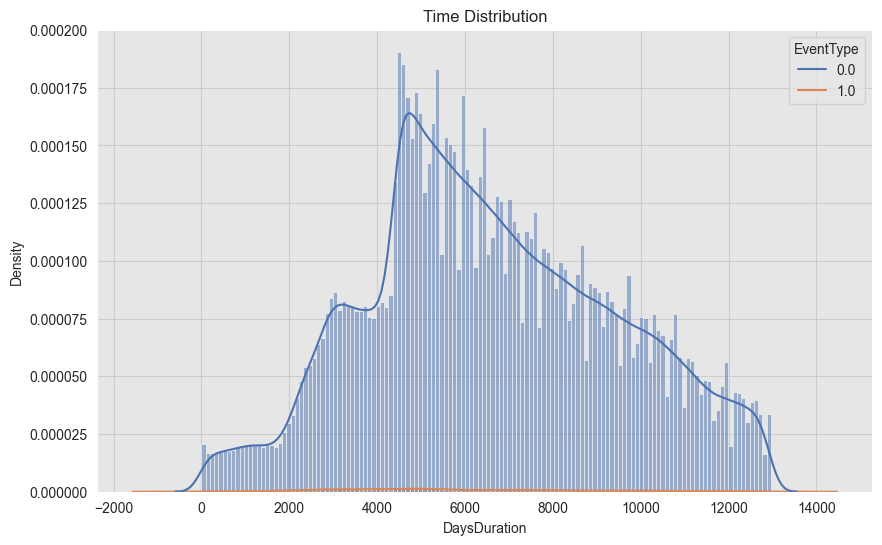

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram with the 'EventType' hue
sns.histplot(data=df, x='DaysDuration', hue='EventType', stat='density', ax=ax)

# Create the KDE plot with the 'EventType' hue
sns.kdeplot(data=df, x='DaysDuration', hue='EventType', fill=False, ax=ax)

# Set the title
ax.set_title('Time Distribution')

# Show the plot
plt.show()


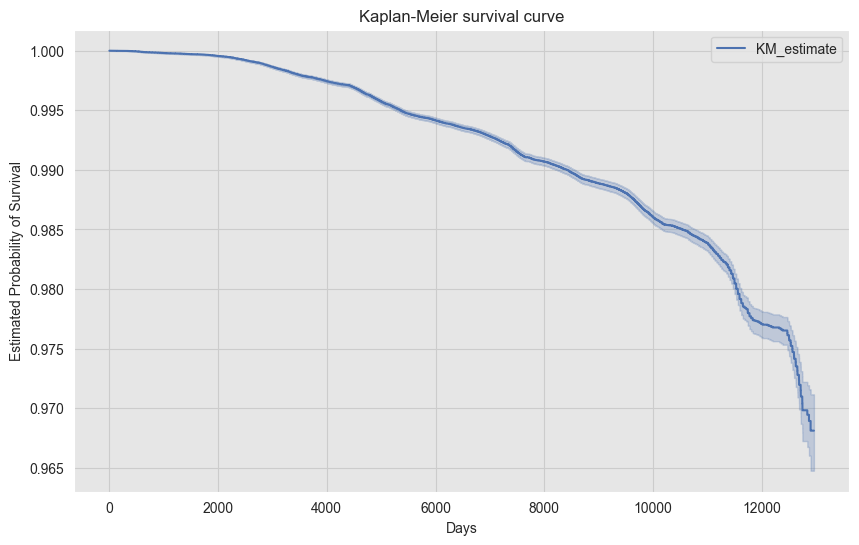

In [213]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations=df['DaysDuration'], event_observed=df['EventType'])

fig, ax =  plt.subplots()
kmf.plot_survival_function(color='C0',ax=ax)
ax.set(
    title='Kaplan-Meier survival curve',
    xlabel='Days',
    ylabel='Estimated Probability of Survival'
);

In [214]:
df.columns

Index(['CompanyNumber', 'yyyy', 'mm', 'DTDmedianFin', 'DTDmedianNonFin',
       'dummy297fin', 'EventDate', 'EventDate_string', 'Duration', 'StartDate',
       'EventType', 'gvkey', 'datadate', 'sic', 'atq', 'ltq', 'dlcq',
       'txditcq', 'cheq', 'lctq', 'actq', 'invtq', 'intanq', 'oibdpq', 'txpq',
       'piq', 'niq', 'revtq', 'cogsq', 'oancfy', 'ivncfy', 'fincfy', 'dltisy',
       'dltry', 'ceqq', 'dpq', 'saleq', 'saley', 'invchy', 'rectq', 'wcapq',
       'prccq', 'epsf12', 'cshoq', 'dvy', 'req', 'dlttq', 'chechy',
       'sector_industry', 'current_ratio', 'quick_ratio', 'cash_ratio',
       'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio',
       'equity_ratio', 'financial_leverage_ratio', 'cashflow_to_debt_ratio',
       'net_profit_margin', 'asset_turnover', 'receivables_turnover',
       'day_sales_outstanding', 'working_capital_turnover',
       'price_to_earnings', 'retention_ratio', 'DaysDuration'],
      dtype='object')

In [215]:
selected_features = [
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'sic', 'atq',
       # 'ltq', 'dlcq', 'txditcq', 'cheq', 
       # 'lctq', 'actq', 'invtq', 'intanq',
       # 'oibdpq', 'txpq', 'piq', 'niq', 'revtq', 'cogsq', 'oancfy', 'ivncfy',
       # 'fincfy', 'dltisy', 'dltry', 'ceqq', 'dpq', 'saleq', 'saley', 'invchy',
       # 'rectq', 'wcapq', 'prccq', 'epsf12', 'cshoq', 'dvy', 'req', 'dlttq',
       # 'chechy', 
       'current_ratio', 'quick_ratio',
       'cash_ratio', 'net_working_capital', 'debt_ratio',
       'debt_to_equity_ratio', 'equity_ratio', 'financial_leverage_ratio',
       'cashflow_to_debt_ratio', 'net_profit_margin', 'asset_turnover',
       'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings', 'retention_ratio',
       'EventType', 'DaysDuration'
       ]

df_selected_features = df[selected_features]


In [216]:
from datetime import datetime

# Define the start date (January 1, 2022)
start_date = datetime(2022, 1, 1)

# Get the current date
current_date = datetime.now()

# Calculate the difference in days
days_difference = (current_date - start_date).days

print(days_difference)

653


In [217]:
# percentile_30 = df['DaysDuration'].quantile(0.3)

train_df = df[df['DaysDuration'] > days_difference]
test_df = df[df['DaysDuration'] <= days_difference]
print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)

train_df shape: (572492, 66)
test_df shape: (6733, 66)


In [218]:
test_df.groupby('EventType')["CompanyNumber"].count()

EventType
0.0    6667
1.0      66
Name: CompanyNumber, dtype: int64

In [219]:
66/(6667+66)

0.009802465468587554

In [220]:
# Define the start date (January 1, 2022)
start_date = datetime(2020, 1, 1)

# Get the current date
current_date = datetime.now()

# Calculate the difference in days
days_difference = (current_date - start_date).days

print(days_difference)

1384


In [221]:
# percentile_40 = train_df['DaysDuration'].quantile(0.4)

val_df = train_df[train_df["DaysDuration"] < days_difference]
train_df = train_df[train_df["DaysDuration"] >= days_difference]
print("train_df shape:", train_df.shape)
print("val_df shape:", val_df.shape)

train_df shape: (564102, 66)
val_df shape: (8390, 66)


In [222]:
train_df.groupby('EventType')["CompanyNumber"].count()

EventType
0.0    559786
1.0      4316
Name: CompanyNumber, dtype: int64

In [223]:
4316/(559772+4316+14)

0.007651098560189469

In [224]:
val_df.groupby('EventType')["CompanyNumber"].count()

EventType
0.0    8308
1.0      82
Name: CompanyNumber, dtype: int64

In [225]:
82/(8308+82)

0.009773539928486293

In [226]:
train_df.drop(["CompanyNumber"], axis=1, inplace=True)
val_df.drop(["CompanyNumber"], axis=1, inplace=True)
test_df.drop(["CompanyNumber"], axis=1, inplace=True)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_3512\2799834248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(["CompanyNumber"], axis=1, inplace=True)


In [227]:
train_df.head()

,yyyy,mm,DTDmedianFin,DTDmedianNonFin,dummy297fin,EventDate,EventDate_string,Duration,StartDate,EventType,...,financial_leverage_ratio,cashflow_to_debt_ratio,net_profit_margin,asset_turnover,receivables_turnover,day_sales_outstanding,working_capital_turnover,price_to_earnings,retention_ratio,DaysDuration
0,2000.0,5,0.0,2.190874,0.0,2000-05-01 00:00:00+00:00,2000 05,4501 days 00:00:00,1988-01-04 00:00:00+00:00,0.0,...,0.115561,0.353320,0.496181,0.500283,0.439043,2.277680,6.329094,-10.552301,5.626957,4501
1,2000.0,12,0.0,1.863172,0.0,2000-12-01 00:00:00+00:00,2000 12,4715 days 00:00:00,1988-01-04 00:00:00+00:00,0.0,...,0.191288,0.270503,0.309987,0.252043,5.105960,0.195850,-30.840000,98.727273,0.127184,4715
2,2000.0,6,0.0,2.257787,0.0,2000-06-01 00:00:00+00:00,2000 06,4532 days 00:00:00,1988-01-04 00:00:00+00:00,0.0,...,0.362524,0.040856,0.553460,0.471932,0.027663,42.234378,1.449149,42.256637,13.899441,4532
3,2000.0,3,0.0,2.599548,0.0,2000-03-01 00:00:00+00:00,2000 03,4440 days 00:00:00,1988-01-04 00:00:00+00:00,0.0,...,1.022712,0.154983,0.351704,1.000000,2.866751,0.348827,0.677361,14.625000,5.160377,4440
4,2000.0,4,0.0,2.318686,0.0,2000-04-01 00:00:00+00:00,2000 04,4471 days 00:00:00,1988-01-04 00:00:00+00:00,0.0,...,1.132316,0.307483,0.303481,0.541856,1.503662,0.665043,3.567568,17.829861,14.014418,4471


In [228]:
val_X = val_df[selected_features]
train_X = train_df[selected_features]
test_X = test_df[selected_features]

# train_X = train_df
# train_X.dropna(inplace=True)
# val_X = val_df
# val_X.dropna(inplace=True)
# test_X = test_df
# test_X.dropna(inplace=True)

In [229]:
train_X

,DTDmedianFin,DTDmedianNonFin,dummy297fin,sic,atq,current_ratio,quick_ratio,cash_ratio,net_working_capital,debt_ratio,...,cashflow_to_debt_ratio,net_profit_margin,asset_turnover,receivables_turnover,day_sales_outstanding,working_capital_turnover,price_to_earnings,retention_ratio,EventType,DaysDuration
0,0.000000,2.190874,0.0,3612.0,1498.445,2.711879,2.711879,0.023497,51.0705,2.065152,...,0.353320,0.496181,0.500283,0.439043,2.277680,6.329094,-10.552301,5.626957,0.0,4501
1,0.000000,1.863172,0.0,4513.0,12535.000,0.970760,0.477193,0.017544,-25.0000,4.480723,...,0.270503,0.309987,0.252043,5.105960,0.195850,-30.840000,98.727273,0.127184,0.0,4715
2,0.000000,2.257787,0.0,5411.0,9032.869,2.342413,2.047556,2.324165,139.8835,5.768308,...,0.040856,0.553460,0.471932,0.027663,42.234378,1.449149,42.256637,13.899441,0.0,4532
3,0.000000,2.599548,0.0,3674.0,14.934,3.474036,2.927300,0.369436,6.6700,0.310698,...,0.154983,0.351704,1.000000,2.866751,0.348827,0.677361,14.625000,5.160377,0.0,4440
4,0.000000,2.318686,0.0,5065.0,44791.000,1.219074,0.805033,-0.019736,3108.0000,0.382480,...,0.307483,0.303481,0.541856,1.503662,0.665043,3.567568,17.829861,14.014418,0.0,4471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579220,1.675733,0.000000,1.0,6798.0,629.113,2.157076,2.067817,0.000000,55.7410,0.449040,...,0.121469,0.549983,0.525228,0.744177,1.263554,2.541536,26.960784,10.180100,0.0,9551
579221,2.612031,0.000000,1.0,6798.0,629.113,2.157076,2.067817,0.000000,55.7410,0.449040,...,0.121469,-40.882716,0.189032,0.002090,478.364198,0.007139,26.960784,-3.532194,0.0,9826
579222,3.102774,0.000000,1.0,6798.0,629.113,2.157076,2.067817,0.000000,55.7410,0.449040,...,0.121469,0.686315,0.366470,0.169443,5.901683,0.578688,26.960784,24.301663,0.0,12141
579223,4.268750,0.000000,1.0,6798.0,629.113,2.157076,2.067817,0.000000,55.7410,0.449040,...,0.121469,0.549983,0.525228,0.744177,1.263554,2.541536,3.372549,10.180100,0.0,10647


In [230]:
# # Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
from lifelines import CoxPHFitter
from sklearn.metrics import roc_auc_score, accuracy_score

cph_list = []
train_auc = []
val_auc = []

# cph = CoxPHFitter()
# cph.fit(df_selected_features, duration_col="DaysDuration", event_col="EventType")
# cph.print_summary()   

step_size = [0.01, 0.05, 0.1, 0.2, 0.4]
penalizer = [0, 0.1, 0.5, 0.7]
l1_ratio = [0, 1.0]

cph = CoxPHFitter(penalizer=0.1, l1_ratio=1.0)
cph.fit(train_X, 'DaysDuration', event_col='EventType', fit_options={'step_size': 0.01})

available_keys = cph.baseline_hazard_['baseline hazard'].keys()
print("Available keys in 'baseline hazard' dictionary:", available_keys)

# baseline_haz = cph.baseline_hazard_['baseline hazard'][12.0]

Available keys in 'baseline hazard' dictionary: Float64Index([ 1384.0,  1385.0,  1386.0,  1387.0,  1388.0,  1389.0,  1390.0,
               1391.0,  1392.0,  1393.0,
              ...
              12904.0, 12907.0, 12923.0, 12929.0, 12930.0, 12931.0, 12932.0,
              12934.0, 12961.0, 12962.0],
             dtype='float64', length=11171)


In [249]:
# # Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
from lifelines import CoxPHFitter
from sklearn.metrics import roc_auc_score, accuracy_score

cph_list = []
train_auc = []
val_auc = []

# cph = CoxPHFitter()
# cph.fit(df_selected_features, duration_col="DaysDuration", event_col="EventType")
# cph.print_summary()   

step_size = [0.01, 0.05, 0.1, 0.2, 0.4]
penalizer = [0, 0.1, 0.5, 0.7]
l1_ratio = [0, 1.0]

for s in step_size:
    for p in penalizer:
        for l in l1_ratio:
            if l == 0:
                if p == 0:
                    cph = CoxPHFitter()
                else:
                    cph = CoxPHFitter(penalizer=p)
            else:
                cph = CoxPHFitter(penalizer=p, l1_ratio=l)

            cph.fit(train_X, 'DaysDuration', event_col='EventType', fit_options={'step_size': s})

            baseline_haz = cph.baseline_hazard_['baseline hazard'][12962.0]
            x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
            x_pred = np.transpose(x_pred)
            train_auc.append(roc_auc_score(train_df['EventType'], x_pred))
            val_x_pred = np.array(cph.predict_partial_hazard(val_X)) * baseline_haz
            val_x_pred = np.transpose(val_x_pred)
            val_auc.append(roc_auc_score(val_df['EventType'], val_x_pred))

            cph_list.append({'cph': cph, 'step_size': s, 'penalizer': p, 'l1_ratio': l})
            

In [233]:
m = max(train_auc)
print(m)
[i for i, j in enumerate(train_auc) if j == m]

0.6372772292646972


[32, 33]

In [234]:
m = max(val_auc)
print(m)
[i for i, j in enumerate(val_auc) if j == m]

0.6540646981457778


[0, 1, 8, 9, 16, 17, 24, 25, 32, 33]

In [235]:
cph_list[16]

{'cph': <lifelines.CoxPHFitter: fitted with 564102 total observations, 559786 right-censored observations>,
 'step_size': 0.1,
 'penalizer': 0,
 'l1_ratio': 0}

In [236]:
cph_list[17]

{'cph': <lifelines.CoxPHFitter: fitted with 564102 total observations, 559786 right-censored observations>,
 'step_size': 0.1,
 'penalizer': 0,
 'l1_ratio': 1.0}

In [237]:
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 564102 total observations, 559786 right-censored observations>
             duration col = 'DaysDuration'
                event col = 'EventType'
                penalizer = 0.7
                 l1 ratio = 1.0
      baseline estimation = breslow
   number of observations = 564102
number of events observed = 4316
   partial log-likelihood = -54188.15
         time fit was run = 2023-10-16 15:20:22 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
DTDmedianFin              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DTDmedianNonFin            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
dummy297fin               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sic                       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
atq                       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
current_ratio             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
quick_ratio                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cash_ratio                 0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_working_capital        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
debt_ratio                 0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
debt_to_equity_ratio      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
equity_ratio              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
financial_leverage_ratio  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cashflow_to_debt_ratio    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_profit_margin          0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
asset_turnover            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
receivables_turnover      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
day_sales_outstanding     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
working_capital_turnover  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
price_to_earnings         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
retention_ratio            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                           cmp to     z    p   -log2(p)
covariate                                              
DTDmedianFin                 0.00 -0.03 0.98       0.03
DTDmedianNonFin              0.00  0.00 1.00       0.00
dummy297fin                  0.00 -0.02 0.98       0.03
sic                          0.00 -0.01 0.99       0.01
atq                          0.00 -0.00 1.00       0.00
current_ratio                0.00 -0.00 1.00       0.00
quick_ratio                  0.00  0.00 1.00       0.00
cash_ratio                   0.00  0.00 1.00       0.00
net_

In [238]:
x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
x_pred = np.transpose(x_pred)
x_pred.shape

(564102,)

In [239]:
roc_auc_score(train_df['EventType'], x_pred)

0.562324285137336

In [240]:
baseline_haz = cph.baseline_hazard_['baseline hazard'][5201.0]
test_x_pred = np.array(cph.predict_partial_hazard(test_X)) * baseline_haz
test_x_pred = np.transpose(test_x_pred)
test_x_pred.shape

(6733,)

In [245]:
print(test_x_pred.min())
print(test_x_pred.max())


2.896424687152881e-05
2.8964396014021498e-05


In [247]:
roc_auc_score(test_df['EventType'], test_x_pred)


0.4876278913327061

In [246]:
import numpy as np
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation, concordance_index

# Create the Cox PH model
cph = CoxPHFitter()

# Perform k-fold cross-validation and calculate the concordance index for the Cox PH model
cph_cindex = np.mean(k_fold_cross_validation(cph, df_selected_features, duration_col='DaysDuration', event_col='EventType', k=5, scoring_method=concordance_index))

# Print the average concordance index
print("Average Concordance Index (CoxPH):", cph_cindex)


NotImplementedError: 

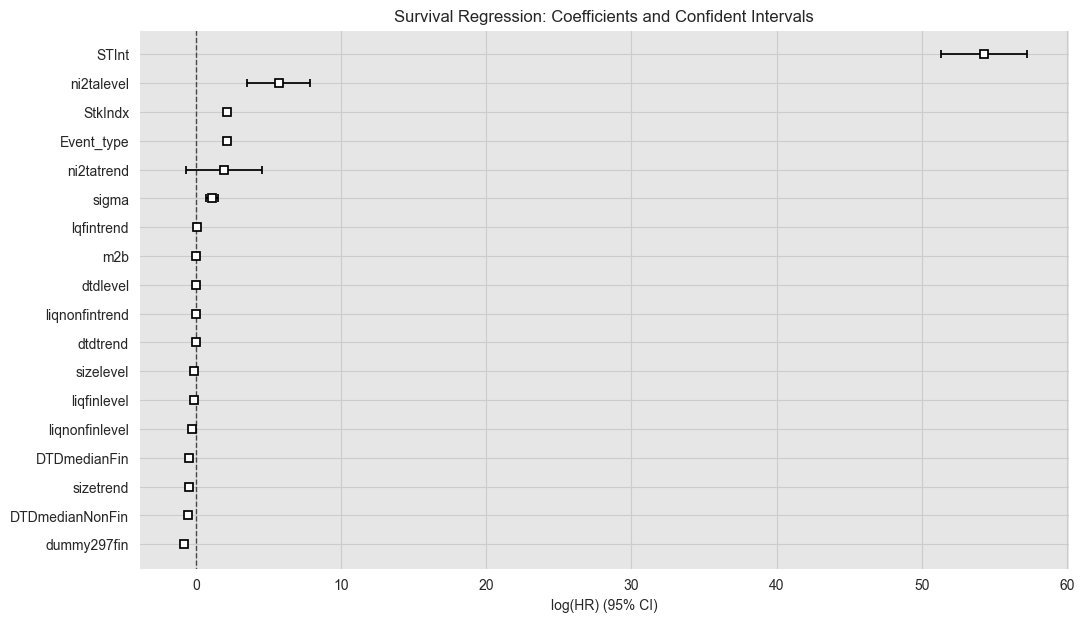

In [ ]:
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);